# Example 1 : from general form to standard form

In [ ]:
# Import useful libraries
import cvxpy as cp
import numpy as np

We solve here-under the general program

In [ ]:
#First we'll initialize the objective
#We can declare x with its size (and sign if needed)
x = cp.Variable(2)
c = np.array([2, 4])
objective = cp.Minimize(c.T @ x)

In [ ]:
#Then we'll write the constraints
A_eq = np.array([3, 2])
A_ineq = np.array([[1, 1],[1 , 0]])
b = np.array([3,0])
constraints = [A_eq @ x == 14, A_ineq @ x >= b] #This must be a list

In [ ]:
#Assemble the problem and then solve it
problem = cp.Problem(objective, constraints)
problem.solve()

-3.999999999752154

In [ ]:
# Print result.
print("\nThe optimal value is", problem.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(problem.constraints[0].dual_value)


The optimal value is -3.999999999752154
A solution x is
[ 8. -5.]
A dual solution is
1.999999999910235


We solve here-under the standard form

In [ ]:
x = cp.Variable(4) #x_1, x_2^{+}, x_2^{-}, and s_1. Recall that x_2 = x_2^{+} - x_2^{-}
c = np.array([2, 4, -4, 0])
objective = cp.Minimize(c.T @ x)

In [ ]:
A_eq = np.array([[1, 1, -1, -1],[3 , 2, -2, 0]])
b = np.array([3,14])
P = np.eye(4)
constraints = [A_eq @ x == b, P @ x >= 0] #This must be a list

In [ ]:
#Assemble the problem and then solve it
problem = cp.Problem(objective, constraints)
problem.solve()

-4.000000024094646

In [ ]:
# Print result.
print("\nThe optimal value is", problem.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(problem.constraints[0].dual_value)


The optimal value is -4.000000024094646
A solution x is
[ 8.00000001e+00  6.12959881e+00  1.11295988e+01 -3.01039591e-09]
A dual solution is
[-8.  2.]


In [ ]:
print("x_1 is")
print(x.value[0])
print("x_2 is")
print(x.value[1]-x.value[2])

x_1 is
8.000000006024116
x_2 is
-5.000000009035721


Train a bit on the following problem:

minimize  $- 4x_1 - 5x_2$

subject to

$x_1 + 2x_2 \leq 3$ \\

$2x1 + x2 = 3$ \\
$x1, x2 \geq 0$

            
           

# Example 2 : formulation to a linear program

Solve the problem with l1 norm (forbidden to use in a project, this is just for validation of the solution obtained with the reformulation)

In [ ]:
# Import useful libraries
import cvxpy as cp
import numpy as np

In [ ]:
x = cp.Variable(2)

In [ ]:
objective = cp.Minimize(2*cp.norm(x[0],1) + x[1])

In [ ]:
A_ineq = np.array([1, 1])
b = np.array([4])
constraints = [A_ineq @ x >= b] #This must be a list

In [ ]:
#Assemble the problem and then solve it
problem = cp.Problem(objective, constraints)
problem.solve()

4.000000071278308

In [ ]:
# Print result.
print("\nThe optimal value is", problem.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(problem.constraints[0].dual_value)


The optimal value is 4.000000071278308
A solution x is
[6.48565663e-08 3.99999994e+00]
A dual solution is
[1.00000002]


Solve the reformulation

In [ ]:
x = cp.Variable(3) # x_1, x_2, t
c = np.array([0, 1, 1])
objective = cp.Minimize(c.T @ x)

In [ ]:
#Then we'll write the constraints
A_ineq = np.array([[1, 1, 0],[-2 , 0, 1], [2 , 0, 1]])
b = np.array([4,0,0])
constraints = [A_ineq @ x >= b] #This must be a list

In [ ]:
#Assemble the problem and then solve it
problem = cp.Problem(objective, constraints)
problem.solve()

4.000000000403228

In [ ]:
# Print result.
print("\nThe optimal value is", problem.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(problem.constraints[0].dual_value)


The optimal value is 4.000000000403228
A solution x is
[6.75885103e-10 4.00000000e+00 1.15576310e-09]
A dual solution is
[1.   0.75 0.25]


# Example 3: Chebychev center of a polyhedron

In [ ]:
# import libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

The pairs $(x_1,x_2)$ for which

$2x_1 + 3 x_2 \leq 13$,

$2x_1 + x_2 \leq 11$,  

$x_1 + 3 x_2 \leq 9, \text{ and }$

$\color{red} {x_1, x_2 \geq 0.} $

is a ${\color{red}polyhedron}$ of $\mathbb{R}^2$.

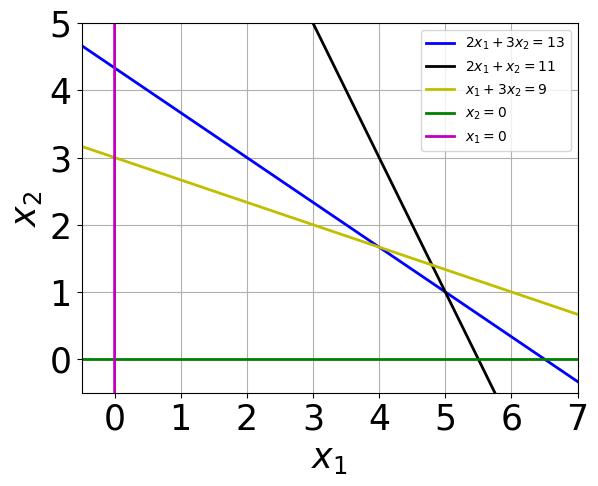

In [ ]:
x1 = np.arange(-1, 10, 0.01)
x2 = np.arange(-1, 12, 0.01)

plt.rcParams.update({'font.size': 25, 'lines.linewidth': 2})

plt.plot(x1, (13-2*x1)/3, 'b')
plt.plot(x1, (11-2*x1), 'k')
plt.plot(x1, (9-x1)/3, 'y')
plt.plot(x1, np.zeros(len(x1)), 'g')
plt.plot(np.zeros(len(x2)), x2, 'm')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(['$2x_1+3x_2 = 13$', '$2x_1 + x_2 = 11$', '$x_1+3x_2 = 9$', '$x_2=0$', '$x_1 = 0$'], loc='upper right', prop={'size': 10})

plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(0, 6, 1))
plt.axis([-0.5, 7, -0.5, 5])

plt.grid()

plt.show()

In [ ]:
def chebycenter(A, b, r0=None):
    """
    Compute the Chebyshev center of the polytope defined by Ax <= b.

    Parameters:
    A : np.ndarray
        Coefficient matrix of the inequalities.
    b : np.ndarray
        Right-hand side vector of the inequalities.
    r0 : float, optional
        Acceptable threshold (lower) for r. If not provided, no upper bound is set.

    Returns:
    c : np.ndarray
        The center of the largest hypersphere enclosed by the polytope.
    r : float
        The radius of the hypersphere.
    """
    n, p = A.shape
    an = np.sqrt(np.sum(A**2, axis=1))

    # Construct the augmented matrix A1
    A1 = np.zeros((n, p + 1))
    A1[:, :p] = A
    A1[:, p] = an

    # Objective function coefficients
    f = np.zeros(p + 1)
    f[p] = -1  # We want to minimize -r, which is equivalent to maximizing r

    # Define the optimization variables
    x = cp.Variable(p + 1)

    # Define the constraints
    constraints = [A1 @ x <= b]

    # Set bounds for the variables
    if r0 is not None:
        lb = [-np.inf] * (p + 1)
        ub = [np.inf] * (p + 1)
        lb[p] = -np.inf
        ub[p] = r0
        constraints += [x >= lb, x <= ub]

    # Define the optimization problem
    problem = cp.Problem(cp.Minimize(f @ x), constraints)

    # Solve the problem
    problem.solve()

    # Extract the results
    c = x.value[:p]
    r = x.value[p]

    return c, r

In [ ]:
A = np.array([[2, 3],[2, 1], [1, 3], [-1, 0], [0, -1] ])
b = np.array([13,11,9,0,0])

In [ ]:
c, r = chebycenter(A, b)

In [ ]:
c

array([1.25658353, 1.25658351])

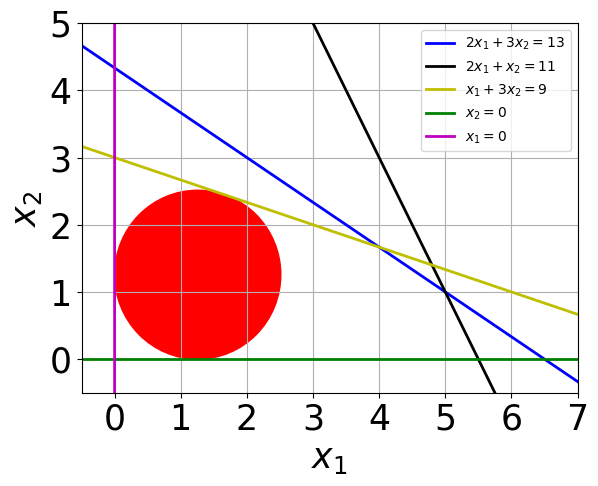

In [ ]:
x1 = np.arange(-1, 10, 0.01)
x2 = np.arange(-1, 12, 0.01)

plt.rcParams.update({'font.size': 25, 'lines.linewidth': 2})

plt.plot(x1, (13-2*x1)/3, 'b')
plt.plot(x1, (11-2*x1), 'k')
plt.plot(x1, (9-x1)/3, 'y')
plt.plot(x1, np.zeros(len(x1)), 'g')
plt.plot(np.zeros(len(x2)), x2, 'm')


circle1 = plt.Circle((c[0], c[1]), r, color='r')
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(['$2x_1+3x_2 = 13$', '$2x_1 + x_2 = 11$', '$x_1+3x_2 = 9$', '$x_2=0$', '$x_1 = 0$'], loc='upper right', prop={'size': 10})

plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(0, 6, 1))
plt.axis([-0.5, 7, -0.5, 5])

plt.grid()

plt.show()

fig.savefig('plot_Chebyshev.png')

Questions:
- What is the formulation considered above ?
- Write the Pythion/CVXPY function to use the other formulation presented during Lecture 2, and check the results.